###NOTE###
Uncomment the cell below to run 'newsapi''transformer','torch' installation

In [24]:
!pip install newsapi-python transformers torch
#print("Necessary libraries installed.")

In [31]:
import numpy as np
import pandas as pd
from newsapi import NewsApiClient
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import seaborn as sns


In [35]:

# IMPORTANT: Replace 'YOUR_NEWS_API_KEY' with your actual News API key.
# It's recommended to store API keys securely, e.g., in environment variables or Colab secrets.
NEWS_API_KEY = 'b341f7e3c7484523947c716f46943cd6'

# Initialize the News API client
newsapi = NewsApiClient(api_key=NEWS_API_KEY)

print("NewsAPI client initialized. Please ensure you've replaced 'YOUR_NEWS_API_KEY' with your actual API key.")

NewsAPI client initialized. Please ensure you've replaced 'YOUR_NEWS_API_KEY' with your actual API key.


In [36]:


query = 'Apple OR AAPL stock'
language = 'en'
sort_by = 'relevancy' # or 'publishedAt'
page_size = 100 # Maximum articles per request

try:
    # Fetch articles
    all_articles = newsapi.get_everything(
        q=query,
        language=language,
        sort_by=sort_by,
        page_size=page_size
    )

    articles_data = []
    if all_articles['status'] == 'ok' and all_articles['articles']:
        for article in all_articles['articles']:
            articles_data.append({
                'source_id': article['source']['id'],
                'source_name': article['source']['name'],
                'author': article['author'],
                'title': article['title'],
                'description': article['description'],
                'url': article['url'],
                'urlToImage': article['urlToImage'],
                'publishedAt': article['publishedAt'],
                'content': article['content']
            })
        df_articles = pd.DataFrame(articles_data)
        print(f"Successfully fetched {len(df_articles)} articles.")
        print("First 5 rows of the articles DataFrame:")
        print(df_articles.head())
    else:
        print("No articles found or API call failed.")
        df_articles = pd.DataFrame()

except Exception as e:
    print(f"An error occurred while fetching articles: {e}")
    df_articles = pd.DataFrame()

Successfully fetched 90 articles.
First 5 rows of the articles DataFrame:
          source_id       source_name                           author  \
0  business-insider  Business Insider  Dominick Reuter,Robert Scammell   
1              None     24/7 Wall St.                  Omor Ibne Ehsan   
2  business-insider  Business Insider                      Jordan Hart   
3              None         MacRumors                 Hartley Charlton   
4              None            Kotaku                 Brittany Vincent   

                                               title  \
0  Apple strikes deal with Google's Gemini to pow...   
1  Buffett’s $24 Billion Selling Spree: The 6 Sto...   
2  Here's how much Apple CEO Tim Cook made last year   
3  Apple CEO Tim Cook Buys $3 Million of Nike Shares   
4  Apple Quietly Drops the Beats Studio Pro by 49...   

                                         description  \
0  Apple and Alphabet have reached a deal that wi...   
1  Investors began to notice tha

In [37]:


query = 'Apple OR AAPL stock'
language = 'en'
sort_by = 'relevancy' # or 'publishedAt'
page_size = 100 # Maximum articles per request

try:
    # Fetch articles
    all_articles = newsapi.get_everything(
        q=query,
        language=language,
        sort_by=sort_by,
        page_size=page_size
    )

    articles_data = []
    if all_articles['status'] == 'ok' and all_articles['articles']:
        for article in all_articles['articles']:
            articles_data.append({
                'source_id': article['source']['id'],
                'source_name': article['source']['name'],
                'author': article['author'],
                'title': article['title'],
                'description': article['description'],
                'url': article['url'],
                'urlToImage': article['urlToImage'],
                'publishedAt': article['publishedAt'],
                'content': article['content']
            })
        df_articles = pd.DataFrame(articles_data)
        print(f"Successfully fetched {len(df_articles)} articles.")
        print("First 5 rows of the articles DataFrame:")
        print(df_articles.head())
    else:
        print("No articles found or API call failed.")
        df_articles = pd.DataFrame()

except Exception as e:
    print(f"An error occurred while fetching articles: {e}")
    df_articles = pd.DataFrame()

Successfully fetched 90 articles.
First 5 rows of the articles DataFrame:
          source_id       source_name                           author  \
0  business-insider  Business Insider  Dominick Reuter,Robert Scammell   
1              None     24/7 Wall St.                  Omor Ibne Ehsan   
2  business-insider  Business Insider                      Jordan Hart   
3              None         MacRumors                 Hartley Charlton   
4              None            Kotaku                 Brittany Vincent   

                                               title  \
0  Apple strikes deal with Google's Gemini to pow...   
1  Buffett’s $24 Billion Selling Spree: The 6 Sto...   
2  Here's how much Apple CEO Tim Cook made last year   
3  Apple CEO Tim Cook Buys $3 Million of Nike Shares   
4  Apple Quietly Drops the Beats Studio Pro by 49...   

                                         description  \
0  Apple and Alphabet have reached a deal that wi...   
1  Investors began to notice tha

In [38]:
columns_to_combine = ['title', 'description', 'content']

# Fill missing values with empty strings in the selected columns
for col in columns_to_combine:
    if col in df_articles.columns:
        df_articles[col] = df_articles[col].fillna('')
    else:
        print(f"Warning: Column '{col}' not found in df_articles. Skipping.")

# Concatenate the cleaned text columns into a new 'text_for_sentiment' column
# Use a period as a separator for better readability and sentence separation
text_parts = []
if 'title' in df_articles.columns: text_parts.append(df_articles['title'])
if 'description' in df_articles.columns: text_parts.append(df_articles['description'])
if 'content' in df_articles.columns: text_parts.append(df_articles['content'])

if text_parts:
    df_articles['text_for_sentiment'] = text_parts[0]
    for i in range(1, len(text_parts)):
        df_articles['text_for_sentiment'] = df_articles['text_for_sentiment'] + '. ' + text_parts[i]
else:
    df_articles['text_for_sentiment'] = ''

# Display the first few rows of the DataFrame with the new column
print("DataFrame with 'text_for_sentiment' column:")
print(df_articles[['title', 'description', 'content', 'text_for_sentiment']].head())

DataFrame with 'text_for_sentiment' column:
                                               title  \
0  Apple strikes deal with Google's Gemini to pow...   
1  Buffett’s $24 Billion Selling Spree: The 6 Sto...   
2  Here's how much Apple CEO Tim Cook made last year   
3  Apple CEO Tim Cook Buys $3 Million of Nike Shares   
4  Apple Quietly Drops the Beats Studio Pro by 49...   

                                         description  \
0  Apple and Alphabet have reached a deal that wi...   
1  Investors began to notice that Warren Buffett ...   
2  Tim Cook's salary was a drop in the bucket of ...   
3  Apple CEO Tim Cook disclosed a roughly $3 mill...   
4  These might very well become your new favorite...   

                                             content  \
0  Apple and Alphabet have reached a big AI deal....   
1  Mark Wilson / Getty Images\r\n<ul><li>Buffett ...   
2  Tim Cook made slightly less in 2025 than he di...   
3  Apple CEO Tim Cook disclosed a roughly $3 mill...   
4 

In [39]:
# 2. Define the FinBERT model name
model_name = "ProsusAI/finbert"

# 3. Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 4. Create a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# 5. Define a function to get FinBERT sentiment
def get_finbert_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 'neutral', 0.0
    try:
        # The FinBERT model outputs a list of dictionaries, e.g., [{'label': 'positive', 'score': 0.99}]
        result = sentiment_pipeline(text[:512]) # Truncate to avoid exceeding model's max input length
        label = result[0]['label']
        score = result[0]['score']
        return label, score
    except Exception as e:
        print(f"Error processing text: {text[:100]}... Error: {e}")
        return 'neutral', 0.0

# 6. Apply the get_finbert_sentiment function to the 'text_for_sentiment' column
# Note: This might take some time depending on the number of articles and their length.
df_articles[['finbert_sentiment_label', 'finbert_sentiment_score']] = df_articles['text_for_sentiment'].apply(lambda x: pd.Series(get_finbert_sentiment(x)))

# 7. Verify the new columns by displaying the head of df_articles
print("DataFrame with FinBERT sentiment scores:")
print(df_articles[['title', 'finbert_sentiment_label', 'finbert_sentiment_score']].head())

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:  62%|######2   | 273M/438M [00:00<?, ?B/s]

Device set to use cpu


DataFrame with FinBERT sentiment scores:
                                               title finbert_sentiment_label  \
0  Apple strikes deal with Google's Gemini to pow...                positive   
1  Buffett’s $24 Billion Selling Spree: The 6 Sto...                negative   
2  Here's how much Apple CEO Tim Cook made last year                negative   
3  Apple CEO Tim Cook Buys $3 Million of Nike Shares                 neutral   
4  Apple Quietly Drops the Beats Studio Pro by 49...                 neutral   

   finbert_sentiment_score  
0                 0.884715  
1                 0.954643  
2                 0.918814  
3                 0.923582  
4                 0.668575  


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`



Sentiment Label Distribution:
finbert_sentiment_label
neutral     57
negative    21
positive    12
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22472\3454559281.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


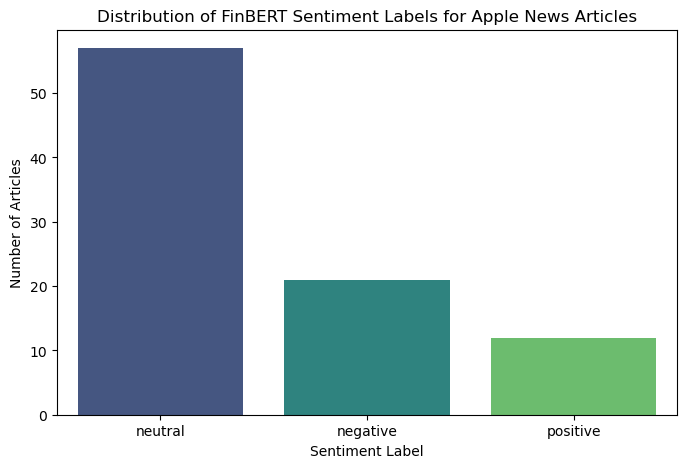

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22472\3454559281.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment Label')


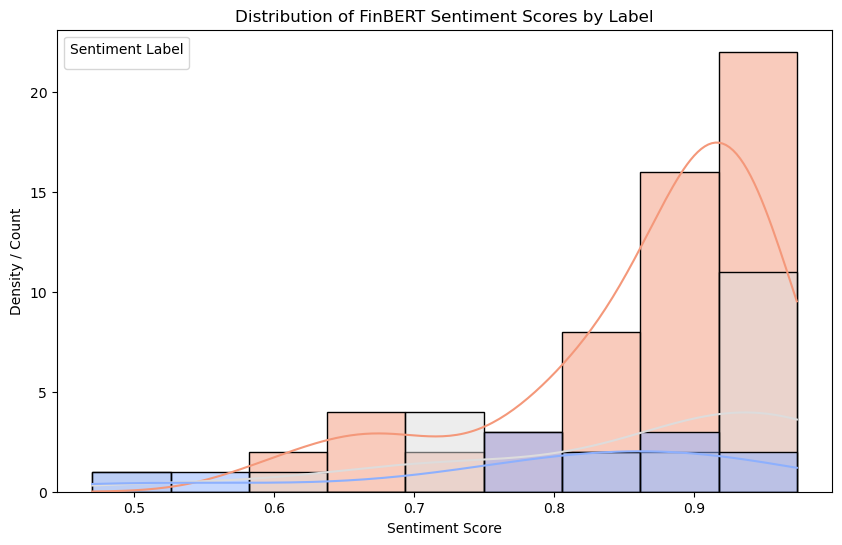

Sentiment analysis distribution and score visualization complete.


In [42]:

# 1. Analyze the distribution of FinBERT sentiment labels
sentiment_counts = df_articles['finbert_sentiment_label'].value_counts()
print("\nSentiment Label Distribution:")
print(sentiment_counts)

# 2. Visualize the sentiment label distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of FinBERT Sentiment Labels for Apple News Articles')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Articles')
plt.show()

# 3. Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_articles, x='finbert_sentiment_score', hue='finbert_sentiment_label', kde=True, palette='coolwarm')
plt.title('Distribution of FinBERT Sentiment Scores by Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Density / Count')
plt.legend(title='Sentiment Label')
plt.show()

print("Sentiment analysis distribution and score visualization complete.")

In [16]:
print("\nDescriptive statistics for FinBERT Sentiment Scores:")
print(df_articles['finbert_sentiment_score'].describe())

# Display articles with highest positive sentiment
print("\nTop 5 Most Positive Articles:")
positive_articles = df_articles[df_articles['finbert_sentiment_label'] == 'positive'].sort_values(by='finbert_sentiment_score', ascending=False)
if not positive_articles.empty:
    print(positive_articles[['title', 'finbert_sentiment_label', 'finbert_sentiment_score', 'url']].head())
else:
    print("No positive articles found.")

# Display articles with lowest (most negative) sentiment
print("\nTop 5 Most Negative Articles:")
negative_articles = df_articles[df_articles['finbert_sentiment_label'] == 'negative'].sort_values(by='finbert_sentiment_score', ascending=False)
if not negative_articles.empty:
    # Assuming score is confidence for the assigned label, a higher score for 'negative' means more confidently negative.
    print(negative_articles[['title', 'finbert_sentiment_label', 'finbert_sentiment_score', 'url']].head())
else:
    print("No negative articles found.")

print("\nSummary of key findings complete.")


Descriptive statistics for FinBERT Sentiment Scores:
count    89.000000
mean      0.843971
std       0.123041
min       0.455196
25%       0.796448
50%       0.889979
75%       0.938135
max       0.973493
Name: finbert_sentiment_score, dtype: float64

Top 5 Most Positive Articles:
                                                title finbert_sentiment_label  \
51  Tesla stock pops as Robotaxi testing with no s...                positive   
14  Nike shares are up after Apple CEO Tim Cook bu...                positive   
72  Palantir Stock Jumps Amid Contract Wins and AI...                positive   
24                Why small hedge funds ruled in 2025                positive   
9   Apple spent 2025 setting itself up for the fut...                positive   

    finbert_sentiment_score                                                url  
51                 0.951494  https://finance.yahoo.com/news/tesla-stock-pop...  
14                 0.942736  https://www.reutersconnect.com/detail?i

In [43]:


# 1. Convert 'publishedAt' column to datetime objects
df_articles['publishedAt'] = pd.to_datetime(df_articles['publishedAt'], errors='coerce')

# 2. Verify the data type of the 'publishedAt' column
print("Data type of 'publishedAt' column after conversion:")
print(df_articles['publishedAt'].dtype)

# 3. Display the first few rows of the DataFrame with the updated 'publishedAt' column
print("\nFirst few rows with converted 'publishedAt' column:")
print(df_articles[['publishedAt', 'title', 'finbert_sentiment_label']].head())

Data type of 'publishedAt' column after conversion:
datetime64[ns, UTC]

First few rows with converted 'publishedAt' column:
                publishedAt  \
0 2026-01-12 16:32:48+00:00   
1 2025-12-23 14:02:07+00:00   
2 2026-01-09 17:52:23+00:00   
3 2025-12-24 16:41:25+00:00   
4 2025-12-25 13:05:26+00:00   

                                               title finbert_sentiment_label  
0  Apple strikes deal with Google's Gemini to pow...                positive  
1  Buffett’s $24 Billion Selling Spree: The 6 Sto...                negative  
2  Here's how much Apple CEO Tim Cook made last year                negative  
3  Apple CEO Tim Cook Buys $3 Million of Nike Shares                 neutral  
4  Apple Quietly Drops the Beats Studio Pro by 49...                 neutral  


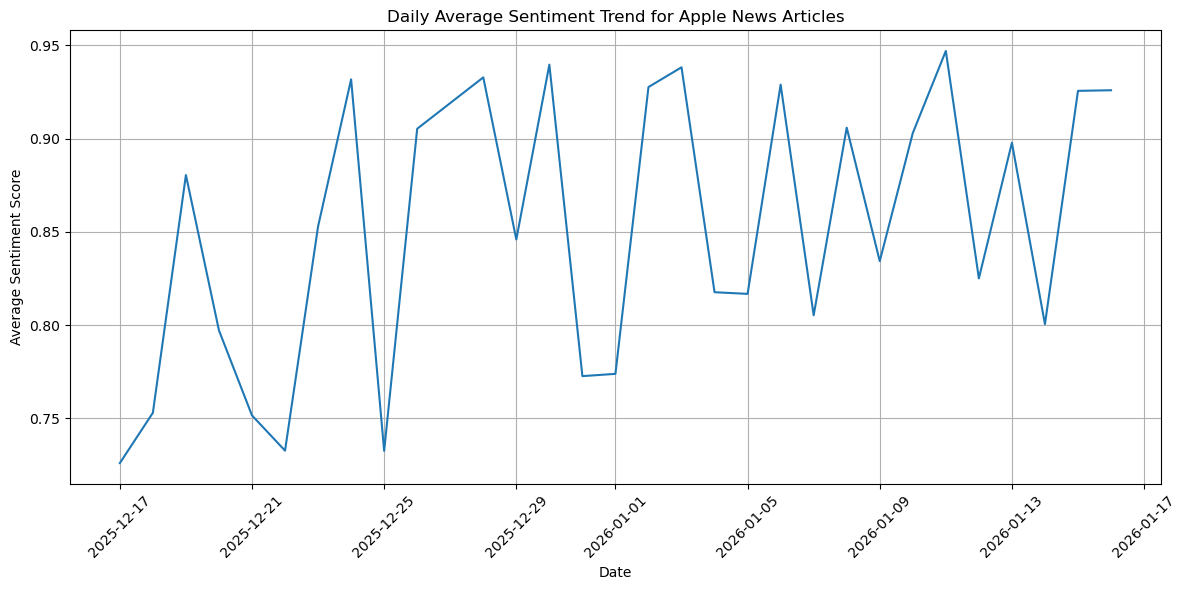

Sentiment trend analysis and visualization complete.


In [44]:

# 1. Create a new column for the date only
df_articles['published_date'] = df_articles['publishedAt'].dt.date

# 2. Group by 'published_date' and calculate the average 'finbert_sentiment_score'
df_sentiment_trend = df_articles.groupby('published_date')['finbert_sentiment_score'].mean().reset_index()

# Sort by date to ensure correct plotting order
df_sentiment_trend = df_sentiment_trend.sort_values(by='published_date')

# 3. Plot the daily average sentiment score over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='published_date', y='finbert_sentiment_score', data=df_sentiment_trend)

# 4. Add appropriate labels and title
plt.title('Daily Average Sentiment Trend for Apple News Articles')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# 5. Display the plot
plt.show()

print("Sentiment trend analysis and visualization complete.")